<a href="https://colab.research.google.com/github/ForestroAung/supervised_ML_projects/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Survival Prediction (Binary Classification)**
Dataset is from Kagg;e
Goal: Predict whether a passenger survived the Titanic Sinking.
Showcase: Handling missing values, one-hot encoding and feature engineering.

In [1]:
import pandas as pd
import seaborn as sns

# This code will not run due to the network issue.
try:
    df = sns.load_dataset('titanic')
    print(df.head())
except Exception as e:
    print(f"Error loading dataset: {e}")

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


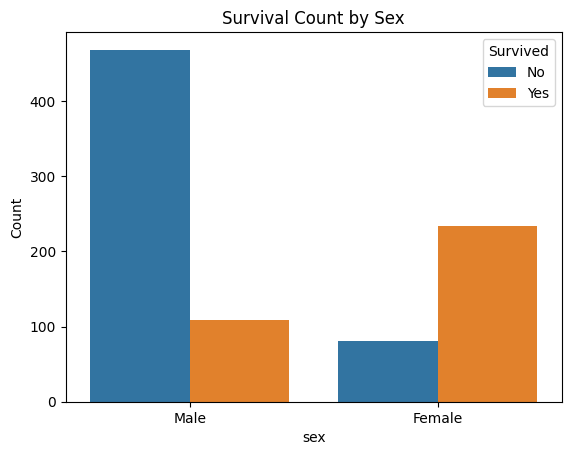

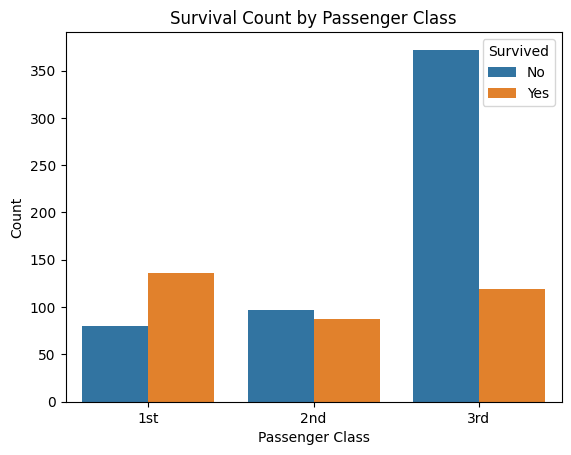

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

#plotting survival by sex
sns.countplot(x='sex',hue='survived',data=df)
plt.title('Survival Count by Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.xticks(ticks=[0,1],labels=['Male','Female'])
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

# Plotting survival by passenger class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['1st', '2nd', '3rd'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Step 3: Data Preprocessing
1. Handling Missing Values: The deck columns is dropped since there's has too many missing entries. The Age and embarked cokumns also have missing values that needed to be filled. For Age, will use median to fill the missing values. For embarked, fill the missing values with the mode(most frequent value).


2. Feauture Selection: elect a subset of features that are most likely to be useful for predicting survival: pclass, sex, age, sibsp, parch, and fare. will drop other columns that are redundant or not directly useful.

3. Encoding Categorical Features: We need to convert categorical features (sex and embarked) into a numerical format that a machine learning model can understand. We'll use one-hot encoding for sex to create binary columns.

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Drop Unnessary or redundant columns
df.drop(['deck','class','who','adult_male','embark_town','alone'], axis=1,inplace=True)


In [8]:
# Handle missing embarked values by filling the mode (most frequent values)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [12]:
#Handle missing age values by filling with the median
df['age'].fillna(df['age'].median(),inplace=True)
#df.method({col: value}, inplace=True)' or df[col] = df[col].method(value)

/tmp/ipython-input-3748184347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [13]:
#Convert Sex into numerical values using Labelencoder
le_sex=LabelEncoder()
df['sex_encoded']=le_sex.fit_transform(df['sex'])
df.drop('sex',axis=1,inplace=True)


In [14]:
#Convert embarked to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['embarked'], drop_first=True)


In [15]:
# Display the preprocessed DataFrame and its info
print("Preprocessed Data (head):")
print(df.head())
print("\nPreprocessed DataFrame Info:")
df.info()

Preprocessed Data (head):
   survived  pclass   age  sibsp  parch     fare alive  sex_encoded  \
0         0       3  22.0      1      0   7.2500    no            1   
1         1       1  38.0      1      0  71.2833   yes            0   
2         1       3  26.0      0      0   7.9250   yes            0   
3         1       1  35.0      1      0  53.1000   yes            0   
4         0       3  35.0      0      0   8.0500    no            1   

   embarked_Q  embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Preprocessed DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   age          891 non-null    float64
 3   sibsp        891 non-null    

In [23]:
# Separate features(X) and target(Y)
X=df.drop(['survived','alive'],axis=1)
y=df['survived']

#Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(f"\n Training set shape:{X_train.shape}")
print(f"Testing set shape:{X_test.shape}")


 Training set shape:(712, 8)
Testing set shape:(179, 8)


# Step 4: Model Training and Evaluation
For this classification problem, the Random Forest Classifier will be used. This is the powerful and populare ensemble model that is well-suited for a variety of tasks and is often a great starting point.
(Reduce Overfitting, Handle well with  missing values, and High accurarcy and also work well with large data). Why have to use random forest; a single tree can be biased, so randomness of random tree voted.


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
from io import StringIO
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Instantiate and train the Random Forest classifer
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

#Make prediction on the test set
y_pred=model.predict(X_test)

#Evaluate the model
print('Confusion matrix')
print(confusion_matrix(y_test,y_pred,labels=[0,1]))

print('\nClassification Report:')
print(classification_report(y_test,y_pred,labels=[0,1],target_names=['Did Not Survive','Survived']))

Confusion matrix
[[91 14]
 [18 56]]

Classification Report:
                 precision    recall  f1-score   support

Did Not Survive       0.83      0.87      0.85       105
       Survived       0.80      0.76      0.78        74

       accuracy                           0.82       179
      macro avg       0.82      0.81      0.81       179
   weighted avg       0.82      0.82      0.82       179

